In [296]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [297]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [298]:
# create a method to measure the accuracy of each model
def generate_accuracy(model, x, y):
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(x)
    confusion_matrix = confusion_matrix(y, y_pred)
    print ("The confusion matrix is:")
    print(confusion_matrix)
    print ("\n")
    from sklearn.metrics import classification_report
    print ("The classification report is as follows:")
    print(classification_report(y, y_pred))
    return 1

In [299]:
# loading the collected file data
data = pd.read_csv("Data-Collisions.csv")
data = data.drop(["LONGITUDE","LATITUDE"],axis=1) 
data.head()

,SEVERITYCODE,WEEKEND,WEATHER,ROADCOND,LIGHTCOND,HOD
0,1,0,Overcast,Wet,Daylight,13:00
1,0,0,Raining,Wet,Dark - Street Lights On,18:00
2,0,0,Overcast,Dry,Daylight,11:00
3,0,0,Clear,Dry,Daylight,9:00
4,1,0,Raining,Wet,Daylight,8:00


# Exploratory Data Analysis

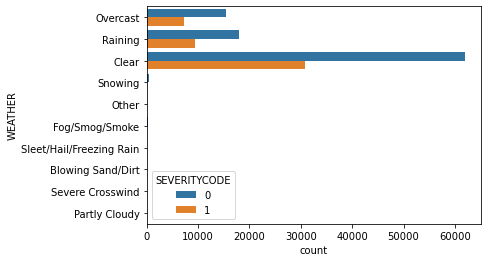

In [300]:
# Plotting the effect of weather on the accident severity codes
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=data)
plt.show()

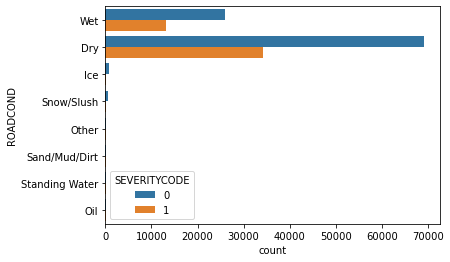

In [301]:
# Plotting the effect of road condition on the accident severity codes
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=data)
plt.show()

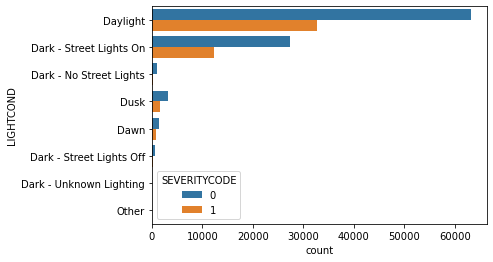

In [302]:
# Plotting the effect of light condition of the road on the accident severity codes
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=data)
plt.show()

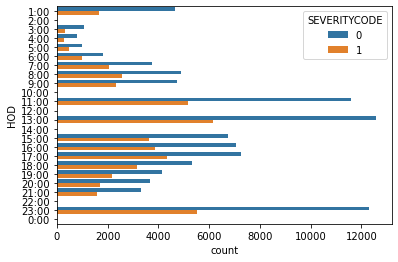

In [303]:
# Plotting the effect of hour of the day on the accident severity codes
sns.countplot(y="HOD", hue="SEVERITYCODE", order=['1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00', '9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00', '17:00','18:00','19:00','20:00','21:00','22:00','23:00','0:00'], data=data)
plt.show()

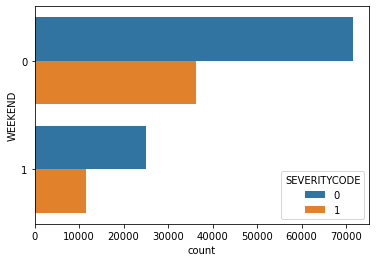

In [304]:
# Plotting the effect of weekend on the accident severity codes
sns.countplot(y="WEEKEND", hue="SEVERITYCODE", data=data)
plt.show()

# Data Preparation

In [305]:
# Observing the distribution of the data for both severity codes
data['SEVERITYCODE'].value_counts()

0    96589
1    47891
Name: SEVERITYCODE, dtype: int64

In [306]:
# Seperating the data based on the severity codes
data_severity_1 = data[data.SEVERITYCODE==0] # SEVERITYCODE 0 = ORIGINAL SEVERITYCODE 1 = Property collisions
data_severity_2 = data[data.SEVERITYCODE==1] # SEVERITYCODE 1 = ORIGINAL SEVERITYCODE 2 = Injury collisions

In [307]:
# Upsampling the severity code 1 to match with the severity code 0
data_severity_2_upsampled = resample(data_severity_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=96589,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled severitycode 2 minority class
data_upsampled = pd.concat([data_severity_1, data_severity_2_upsampled])
 
# Display new class counts
data_upsampled.SEVERITYCODE.value_counts()

1    96589
0    96589
Name: SEVERITYCODE, dtype: int64

In [308]:
# Checking the first values of our data frame
data_upsampled.head()

,SEVERITYCODE,WEEKEND,WEATHER,ROADCOND,LIGHTCOND,HOD
1,0,0,Raining,Wet,Dark - Street Lights On,18:00
2,0,0,Overcast,Dry,Daylight,11:00
3,0,0,Clear,Dry,Daylight,9:00
5,0,1,Clear,Dry,Daylight,17:00
7,0,0,Clear,Dry,Daylight,23:00


In [309]:
# Checking the data types
data_upsampled.dtypes

SEVERITYCODE     int64
WEEKEND          int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
HOD             object
dtype: object

In [316]:
# Creating the list of dummy variables for the categorical data
data_final = pd.get_dummies(data_upsampled, columns=['WEATHER','ROADCOND','LIGHTCOND','HOD'])

In [317]:
# Splitting the data into training and test dataset
training_dataset, test_dataset = train_test_split(data_final, train_size=0.7, test_size=0.3)

In [318]:
# Checking the values of the training dataset severity codes 
training_dataset.SEVERITYCODE.value_counts()

1    67678
0    67546
Name: SEVERITYCODE, dtype: int64

In [319]:
# Checking the values of the test dataset severity codes
test_dataset.SEVERITYCODE.value_counts()

0    29043
1    28911
Name: SEVERITYCODE, dtype: int64

In [320]:
# Checking the shape of the training dataset
training_dataset.shape

(135224, 46)

In [321]:
# Checking the created dummy columns of the categorical variables
training_dataset.dtypes

SEVERITYCODE                          int64
WEEKEND                               int64
WEATHER_Blowing Sand/Dirt             uint8
WEATHER_Clear                         uint8
WEATHER_Fog/Smog/Smoke                uint8
WEATHER_Other                         uint8
WEATHER_Overcast                      uint8
WEATHER_Partly Cloudy                 uint8
WEATHER_Raining                       uint8
WEATHER_Severe Crosswind              uint8
WEATHER_Sleet/Hail/Freezing Rain      uint8
WEATHER_Snowing                       uint8
ROADCOND_Dry                          uint8
ROADCOND_Ice                          uint8
ROADCOND_Oil                          uint8
ROADCOND_Other                        uint8
ROADCOND_Sand/Mud/Dirt                uint8
ROADCOND_Snow/Slush                   uint8
ROADCOND_Standing Water               uint8
ROADCOND_Wet                          uint8
LIGHTCOND_Dark - No Street Lights     uint8
LIGHTCOND_Dark - Street Lights Off    uint8
LIGHTCOND_Dark - Street Lights O

# Data Modelling

In [322]:
# Splitting the dependent and independent variables of the training and test dataset
X_train =training_dataset.loc[:, training_dataset.columns != 'SEVERITYCODE']
y_train =training_dataset.loc[:, training_dataset.columns == 'SEVERITYCODE']
X_test =test_dataset.loc[:, test_dataset.columns != 'SEVERITYCODE']
y_test =test_dataset.loc[:, test_dataset.columns == 'SEVERITYCODE']

In [323]:
#  Building a logistic regression model before the feature selection process
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(X_train,y_train)

In [324]:
# Get the model accuracy score for the baseline model
generate_accuracy(lr_baseline_model, X_test, y_test)

Accuracy is:  0.529109293577665
F1 score is:  0.5375830283313001


The confusion matrix is 
[[14801 14242]
 [13048 15863]]


              precision    recall  f1-score   support

           0       0.53      0.51      0.52     29043
           1       0.53      0.55      0.54     28911

    accuracy                           0.53     57954
   macro avg       0.53      0.53      0.53     57954
weighted avg       0.53      0.53      0.53     57954



1

# Recursive feature elimination with cross validation

In [325]:
# Using recursive feature elimination process with cross validate to perform feature selection
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 43
Best features : Index(['WEEKEND', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', 'ROADCOND_Dry',
       'ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Other',
       'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other', 'HOD_11:00',
       'HOD_13:00', 'HOD_15:00', 'HOD_16:00', 'HOD_17:00', 'HOD_18:00',
       'HOD_19:00', 'HOD_1:00', 'HOD_21:00', 'HOD_23:00', 'HOD_3:00',
       'HOD_4:00', 'HOD_5:00', 'HOD_6:00', 'HOD_7:00', 'HOD_8:00', 'HOD_9:00'],
      dtype='object')


In [326]:
# Comparing the scores of each variable
rfecv.grid_scores_

array([0.501, 0.502, 0.503, 0.504, 0.505, 0.507, 0.509, 0.51 , 0.513,
       0.514, 0.514, 0.514, 0.514, 0.514, 0.514, 0.515, 0.517, 0.519,
       0.521, 0.523, 0.525, 0.525, 0.525, 0.525, 0.525, 0.525, 0.526,
       0.526, 0.526, 0.526, 0.527, 0.526, 0.526, 0.527, 0.527, 0.527,
       0.527, 0.527, 0.527, 0.527, 0.527, 0.528, 0.528, 0.527, 0.528])

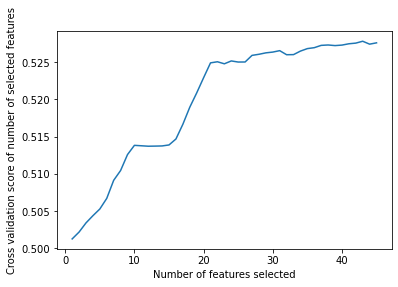

In [327]:
# Plot the figure of selected features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [334]:
# Splitting the test and train data based on the feature selection process
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [335]:
# Fitting the logistic regression based on the selected features
lr_rfecv_model = clf_lr.fit(X_train_rfecv, y_train)

# Logistic Regression Model

In [336]:
# Generate accuracy for the logistic regression model with selected features
generate_accuracy(lr_rfecv_model, X_test_rfecv, y_test)

Accuracy is:  0.5290402733202195
F1 score is:  0.5375309227693247


The confusion matrix is 
[[14798 14245]
 [13049 15862]]


              precision    recall  f1-score   support

           0       0.53      0.51      0.52     29043
           1       0.53      0.55      0.54     28911

    accuracy                           0.53     57954
   macro avg       0.53      0.53      0.53     57954
weighted avg       0.53      0.53      0.53     57954



1

# KNN Classification Model

In [337]:
# Using KNN Classifier to build the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_rfecv, y_train)

KNeighborsClassifier(metric='euclidean')

In [332]:
# predicting the dependent variable using KNN Classifier
y_pred = knn.predict(X_test_rfecv)

In [338]:
# Accuracy generation for the KNN Classifier
generate_accuracy(knn, X_test_rfecv, y_test)

Accuracy is:  0.5147013148359043
F1 score is:  0.5651871434534576


The confusion matrix is 
[[11550 17493]
 [10632 18279]]


              precision    recall  f1-score   support

           0       0.52      0.40      0.45     29043
           1       0.51      0.63      0.57     28911

    accuracy                           0.51     57954
   macro avg       0.52      0.51      0.51     57954
weighted avg       0.52      0.51      0.51     57954



1

# SVM Classification Model

In [351]:
# Creating the SVM classifier model using linear kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_rfecv, y_train)

SVC(kernel='linear')

In [352]:
# Predicting the dependent variable using the SVM classifier
y_pred = svclassifier.predict(X_test_rfecv)

In [353]:
# Accuracy prediction using linear SVM classifier
generate_accuracy(svclassifier, X_test_rfecv, y_test)

Accuracy is:  0.5286434068399075
F1 score is:  0.5275428492364101


The confusion matrix is 
[[15386 13657]
 [13660 15251]]


              precision    recall  f1-score   support

           0       0.53      0.53      0.53     29043
           1       0.53      0.53      0.53     28911

    accuracy                           0.53     57954
   macro avg       0.53      0.53      0.53     57954
weighted avg       0.53      0.53      0.53     57954



1

In [357]:
# Creating SVM classifier using sigmoid kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train_rfecv, y_train)

SVC(kernel='sigmoid')

In [358]:
# Predicting the dependent variable using SVM classifier
y_pred = svclassifier.predict(X_test_rfecv)

In [360]:
# Generating an accuracy model for sigmoid SVM Classifier
generate_accuracy(svclassifier, X_test_rfecv, y_test)

Accuracy is:  0.4986195948510888
F1 score is:  0.4977963670301941


The confusion matrix is 
[[14496 14547]
 [14510 14401]]


              precision    recall  f1-score   support

           0       0.50      0.50      0.50     29043
           1       0.50      0.50      0.50     28911

    accuracy                           0.50     57954
   macro avg       0.50      0.50      0.50     57954
weighted avg       0.50      0.50      0.50     57954



1